# Exercise Sheet 05: Recommender Systems

**Introduction to Data Mining WS23/24**  
**Bielefeld University**  
**Alina Deriyeva, Benjamin Paaßen**  
**Exercise Sheet Publication Date: 2024-01-08**  
**Exercise Sheet Submission Deadline: 2024-01-19, noon (i.e. 12:00)**, via **moodle** (please do not use e-mail submissions anymore).

**NOTE** The use of language models/AI tools is permitted IF you notify us of the use (just indicate it in the respective task) and are still able to understand and present your results. We also appreciate it if you link to a chatlog of the interaction with the language model/AI tool so that we can understand better how students tend to use these tools.

**PLEASE INDICATE ALL AUTHORS OF THE SUBMISSION IN THIS FIELD**

### Preamble: Data set

Consider the data set in `sheet05_data.csv`. This data set contains the study progress of 50 students in a fictional university bachelor computer science dgree.

Each row corresponds to one attempt of one student at a course. The first column contains the student index $i$, the second column the time step $t$, the third column the course index $j$, and the fourth column the grade the student achieved, where -2 means failed, -1 means passed with a not so good grade, +1 means passed with a good grade, and +2 means passed with an excellent grade.

The courses are the following.

In [8]:
courses = ['A&D', 'math', 'programming', 'technical CS', 'theoretical CS', 'robotics', 'machine learning', 'data mining', 'software engineering']
grades  = ['failed', 'passed', 'good', 'excellent']
grade_map = {
    -2: 'failed',
    -1: 'passed',
    1: 'good',
    2: 'excellent'
}

The following codes loads the data and prints the progress for the first student.

In [30]:
import numpy as np
import matplotlib.pyplot as plt

X = np.loadtxt('sheet05_data.csv', skiprows = 1, delimiter = '\t', dtype=int)

t = 0
print('progress for student 0')
while True:
    i = X[t, 0]
    if i > 0:
        break
    j = X[t, 2]
    g = X[t, 3]
    print('time %d: \"%s\" with grade \"%s\"' % (t, courses[j], grade_map[g]))
    t += 1


progress for student 0
time 0: "math" with grade "good"
time 1: "A&D" with grade "passed"
time 2: "technical CS" with grade "failed"
time 3: "programming" with grade "failed"
time 4: "data mining" with grade "good"
time 5: "technical CS" with grade "passed"
time 6: "programming" with grade "good"
time 7: "software engineering" with grade "excellent"
time 8: "robotics" with grade "failed"
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]


## Markov chains

In the following tasks, we will apply a Markov chain to this data set. A Markov chain is defined by two types of parameters: For each course $j$, we have a starting probability $\pi_j$. And for each pair for courses $(j, k)$, we have a probability $p_{j, k}$ that indicates the likelihood of attempting course $k$ after course $j$.

### Task 05.01

Compute a Markov Chain based on the given data set. In particular.

1. Generate a vector `pi` with `len(courses)` entries where `pi[j]` is the number of times course `j` was attempted as first course.
2. Divide `pi` by its sum to obtain probabilities.
3. Generate a matrix `P` with `len(courses) x len(courses)` entries where `P[j, k]` is the number of times course `k` was attempted after course `j`.
4. Divide each row of `P` by its sum to obtain probabilities.

In [39]:
students = np.unique(X.T[0])


pi = np.zeros(len(courses))
for first_try in X[np.where(X.T[1] == 0)]:
    pi[first_try[2]] += 1
pi /= pi.sum()

P = np.zeros((len(courses), len(courses)))

for student in students:
    history = X[np.where(X.T[0] == student)]
    for i in range(0, len(history)-1):
        first = history[i][2]
        second = history[i+1][2]
        P[first, second] += 1

# source for this: https://stackoverflow.com/a/16202486/4545369
P = P / P.sum(axis=1, keepdims=True)

[[ 2. 12.  4.  7.  7.  4.  4.  0.  7.]
 [ 7. 18.  6.  7.  6.  1.  8. 14.  3.]
 [11.  9.  2.  7.  2.  5.  1.  3. 11.]
 [ 2.  5. 12.  3.  4.  9.  4.  7.  0.]
 [ 0.  4.  7.  6.  2.  0.  2.  0.  1.]
 [ 3.  5.  3.  0.  5.  2.  4.  1.  3.]
 [ 7.  0.  3.  3.  4.  2.  1.  4.  3.]
 [ 7.  0.  3.  5.  3.  5.  5.  0.  3.]
 [ 2.  7.  0.  6.  3.  4.  1.  4.  3.]]
[[0.04255319 0.25531915 0.08510638 0.14893617 0.14893617 0.08510638
  0.08510638 0.         0.14893617]
 [0.1        0.25714286 0.08571429 0.1        0.08571429 0.01428571
  0.11428571 0.2        0.04285714]
 [0.21568627 0.17647059 0.03921569 0.1372549  0.03921569 0.09803922
  0.01960784 0.05882353 0.21568627]
 [0.04347826 0.10869565 0.26086957 0.06521739 0.08695652 0.19565217
  0.08695652 0.15217391 0.        ]
 [0.         0.18181818 0.31818182 0.27272727 0.09090909 0.
  0.09090909 0.         0.04545455]
 [0.11538462 0.19230769 0.11538462 0.         0.19230769 0.07692308
  0.15384615 0.03846154 0.11538462]
 [0.25925926 0.         0.111111

### Task 05.02

Try to understand the following code. Then, execute it.

In [40]:
print("for a student who has not attempted any course yet, the Markov chain would predict next:")
for j in range(len(courses)):
    print("  \"%s\" with probability %d%%" % (courses[j], 100 * pi[j]))

for last_j in range(len(courses)):
    print("for a student who has attempted \"%s\" last, the Markov chain would predict next:" % courses[last_j])
    for j in range(len(courses)):
        print("  \"%s\" with probability %d%%" % (courses[j], 100 * P[last_j, j]))

for a student who has not attempted any course yet, the Markov chain would predict next:
  "A&D" with probability 20%
  "math" with probability 34%
  "programming" with probability 26%
  "technical CS" with probability 20%
  "theoretical CS" with probability 0%
  "robotics" with probability 0%
  "machine learning" with probability 0%
  "data mining" with probability 0%
  "software engineering" with probability 0%
for a student who has attempted "A&D" last, the Markov chain would predict next:
  "A&D" with probability 4%
  "math" with probability 25%
  "programming" with probability 8%
  "technical CS" with probability 14%
  "theoretical CS" with probability 14%
  "robotics" with probability 8%
  "machine learning" with probability 8%
  "data mining" with probability 0%
  "software engineering" with probability 14%
for a student who has attempted "math" last, the Markov chain would predict next:
  "A&D" with probability 10%
  "math" with probability 25%
  "programming" with probability 

### Task 05.03

1. Consider a student who has attempted no course, yet. What are the probabilities, according to the Markov chain, to attempt "theoretical CS", "robotics", "machine learning", "data mining", or "software engineering", next? How do you explain these probabilities?
2. Consider a student who has attempted "math" last. What is the probability, as predicted by the Markov chain, to attempt "math" again? How do you explain this probability?

**Answer:**

1.
theoretical CS: 0%
robotics: 0%
machine learning: 0%
data mining: 0%
software engineering: 0%

explanation: There are no students in the dataset who attended any of these as their first course.

2.
there is a 25% chance of this, probably because the student failed the course

### Task 05.04

Assume we wanted to use this Markov chain for recommendations by always recommending the course with the highest probability.

Discuss, whether this recommendation scheme makes sense for this data set. In particular:
* Explain at least one advantage of Markov Chain-based recommendation for this data set.
* Explain at least three problems of Markov Chain-based recommendation for this data set.

**ANSWER:**

**Advantage:**
the dataset closely mirrors real student behavior
**Disadvantages:**
the student course passing history are not accounted for --> could suggest already completed courses
the student history is not accounted for, only the current state is used --> could suggest already completed courses
student preferences, i.e. which courses they perform better or worse on

## Collaborative filtering

User-based collaborative filtering tries to recommend courses to a student based on the grades of students who achieved similar grades previously.

More precisely, let $g_1, \ldots, g_m$ be the grades of a new student for each course, where $g_j = 0$ if a course was not yet attempted. And let $g_{i, 1}, \ldots, g_{i, m}$ be the grades of student $i$ for each course.

Then, user-based collaborative filtering generates recommendations as follows.

1. Compute the similarity $s_i$ of the grades of the new student on any course to the grades of prior students $i$. For example, we can use the cosine similarity:
\begin{equation}
s_i = \frac{\sum_{j=1}^m g_j \cdot g_{i, j}}{\sqrt{\sum_{j=1}^m g_j^2} \cdot \sqrt{\sum_{j=1}^m g_{i, j}^2}}.
\end{equation}
2. We compute the estimated rating of the new student for course $j$ via the equation:
\begin{equation}
g_j \approx \frac{\sum_{i : g_{i, j} \neq 0}^N s_i \cdot g_{i, j}}{\sum_{i : g_{i, j} \neq 0} s_i},
\end{equation}
in other words we take the weighted average grade of all students who have attempted the course.

### Task 05.05

Compute a matrix $G$ with one row per student and one column per course with entries $g_{i, j}$ as defined above, i.e. the grade of student $i$ on course $j$ in their final attempt on the course, where $g_{i, j} = 0$ if student $i$ has not yet attempted course $j$. Print the matrix.

In [46]:
G = np.zeros((len(students), len(courses)))

for entry in X:
    G[entry[0], entry[2]] = entry[3]
print(G)

[[-1.  1.  1. -1.  0. -2.  0.  1.  2.]
 [ 1. -1.  1. -2.  1.  0.  1.  2. -2.]
 [ 2. -1.  1. -1.  2.  0.  0. -1. -1.]
 [-1. -2. -1. -2.  1.  0.  0.  0.  0.]
 [ 0.  1.  0. -2.  0.  0. -2.  0.  0.]
 [-1.  1.  1.  1. -1.  1.  1. -1.  1.]
 [ 1. -2.  1. -1. -1. -2.  0.  0.  2.]
 [ 1. -1.  1.  2.  2.  0. -1.  1.  1.]
 [ 2. -1.  2.  2. -1.  0.  0.  2.  2.]
 [-1.  1. -1.  1. -2.  1.  0. -1.  1.]
 [-1. -2. -1. -1.  1.  0.  0.  0.  1.]
 [ 2. -1.  2. -1. -1.  1.  0.  0. -1.]
 [-2. -2. -1. -1.  0. -2.  0.  0.  0.]
 [-2.  2. -1.  2.  0. -1.  2.  2.  0.]
 [-2.  2. -1. -1.  0.  0.  0.  2. -2.]
 [ 1. -1.  1.  2.  2. -1.  0.  0. -1.]
 [-1. -1.  2.  0. -2.  0. -1.  2.  0.]
 [-1. -1. -1. -1.  1.  0. -1. -1.  0.]
 [ 1. -1. -1. -1.  1. -1.  1.  2.  0.]
 [-1. -1.  2. -1. -1. -1.  2.  0.  0.]
 [-2. -1.  1.  1.  0.  1.  1. -1.  1.]
 [ 1.  1.  1.  2.  1. -1.  2. -1.  0.]
 [ 2. -1.  1. -1.  0. -2. -2.  1.  1.]
 [ 2. -1. -1. -1.  1.  0. -1.  1.  0.]
 [-2. -1.  0.  0.  0.  0.  1.  0.  0.]
 [ 1. -1.  1.  1.  2.  1.

### Task 05.06

Write a python function that takes a vector of grades as input and returns a copy of this vector where each zero entry is replaced with the collaborative filtering estimate of the grade according to the scheme above.

Use your function to print the estimated grades for two fictional students:
1. A student who has achieved an excellent grade in programming and good in technical CS as well as A&D but only passing in math and has not yet attempted any other course.
2. A student who has achieved an excellent grade in math and A&D but only passing in technical CS and programming and has not yet attempted any other course.

Which course would you recommend for these two students, respectively, given the grade estimates?

In [69]:
def grade_estimate(grades):
    s = np.zeros(len(students))
    for student in students:
        s[student] = cosine_similarity(G[student], grades)
    G_bin = (G != 0).astype(int)
    estimated_rating = np.matmul(s, G) / np.matmul(s, G_bin)
    print(estimated_rating)



def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

grade_estimate(np.asarray([1, -1, 2, 1, 0, 0, 0, 0, 0]))
grade_estimate(np.asarray([2, 2, 0, -1, 0, 0, 0, 0, 0]))


[ 2.58508054 -1.63389833  3.02212801  1.25811828  0.34619747 -0.18696925
 -0.69683812  0.96515275  0.10829712]
[-5.70676525 -3.87886339 -0.41562682  1.8295475  -3.34210304  0.05378011
  9.41606366  3.34286937  2.46147326]


**ANSWER:**
I would suggest data mining and machine learning respectively

### Task 05.07

Discuss whether collaborative filtering makes sense for this kind of data. In particular:

* Explain at least one advantage of collaborative filtering for this data set.
* Explain at least two problems of collaborative filtering for this data set.

**ANSWER:**

**Advantage:**
Performance on other tasks is taken into account, also this works with any number of previously taken courses
**Disadvantages:**
Predictions are not reasonable. The linear progression of numerical values for grades also makes no sense, the distance between failed and passed should not be the same as good and excellent. Also, the model does not take into account when exactly a student took a course, older results/grades may not be as useful as newer ones.

## Matrix factorization

Given an $N \times m$ grading matrix $G$, matrix factorization attempts to find two matrices, namely a $N \times K$ matrix of student rperesentations $U$ and a $K \times m$ matrix of course representations $V$, such that the Frobenius norm $\lVert G - U \cdot V \rVert_F$ is minimized for a given, small $K$. This is achieved via singular value decomposition.

A singular value decomposition returns three output arguments:
1. The matrix of eigenvectors $\tilde U$ of $G \cdot G^T$.
2. The matrix of eigenvalues $\Lambda$ of $G^T \cdot G$.
3. The matrix of eigenvectors $\tilde V$ of $G^T \cdot G$.

The original matrix $G$ can be losslessly reconstructed via $\tilde U_{:, :m} \cdot \Lambda \cdot \tilde V$, taking only the first $m$ columns of $\tilde U$.

For matrix factorization, we decide on a number of $K \ll m$ latent factors and define the student representations as $U := \tilde U_{:, :K} \cdot \sqrt{\Lambda_{:K, :K}}$ and the course representations as $V := \sqrt{\Lambda_{:K, :K}} \cdot \tilde V$.

### Task 05.08

Provide a python function which takes a $N \times m$ grade matrix $G$ as well as a number of latent components $K$ as input and returns the $N \times K$ matrix of student representations $U$ and the $K \times m$ matrix of course representations $V$.

Use the function `np.linalg.svd` to perform the singular value decomposition.

In [113]:
def mat_fact(G, K):
    U_tilde, Lambda, V_tilde = np.linalg.svd(G)
    Lambda = np.diag(Lambda)
    U = np.matmul(U_tilde[:, :K], np.sqrt(Lambda[:K, :K]))
    V = np.matmul(np.sqrt(Lambda[:K, :K]), V_tilde[:K,])
    return U, V

mat_fact(G, 4)
pass

### Task 05.09

Provide a plot with the number of latent dimensions $K$ on the x axis and the reconstruction error $\lVert G - U \cdot V \rVert_F$ on the y axis for $K$ between 1 and 9.

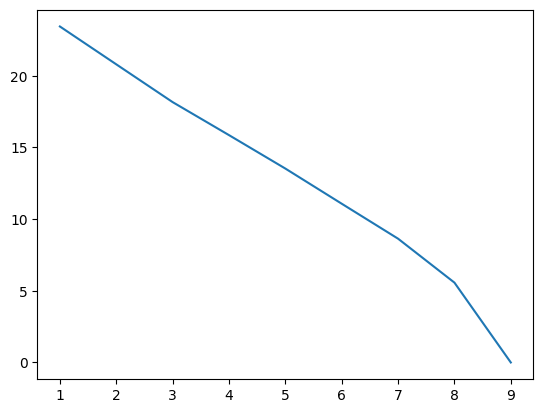

In [114]:
def recon_error(G, U, V):
    return np.linalg.norm(G-np.matmul(U, V))

Ks = []
errors = []
for k in range(1, 10):
    U, V = mat_fact(G, k)
    Ks.append(k)
    errors.append(recon_error(G, U, V))

plt.plot(Ks, errors)


### Task 05.10

Provide two scatter plots, one for the student representations $U$, and one for the course representations $V$, in $K$ dimensions. The course representations should be labeled with the course names.

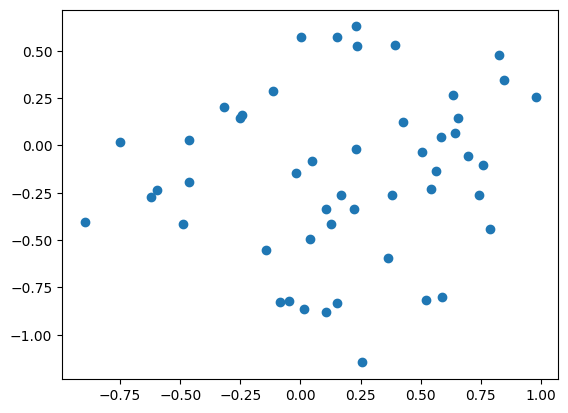

(9,)


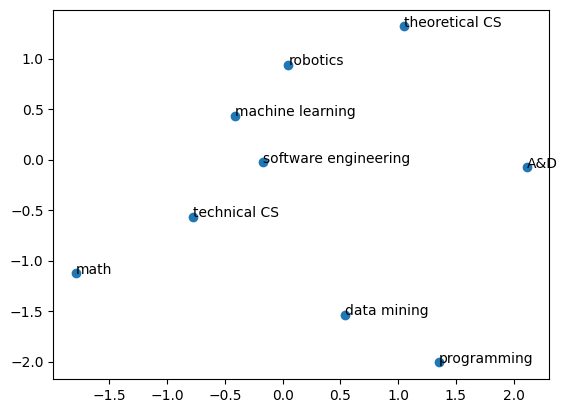

In [125]:
U, V = mat_fact(G, 2)

# student representations

plt.scatter(U.T[0], U.T[1])
plt.show()

# course representations
X = V[0]
Y = V[1]
print(X.shape)
fig, ax = plt.subplots()
ax.scatter(X, Y)
#https://stackoverflow.com/a/14434334/4545369
for i, course in enumerate(courses):
    ax.annotate(course, (X[i], Y[i]))


### Task 05.11

Make a copy of the original grading matrix $G$.
In the copy, fill in zeros using the entries of the product $U \cdot V$ for $K = 2$.
Plot the resulting grading matrix.

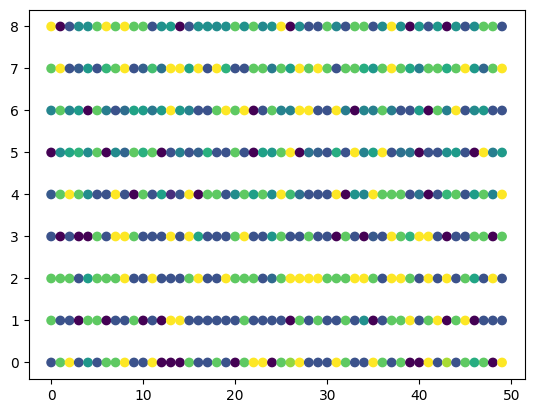

In [137]:
U, V = mat_fact(G, 2)

G_copy = G.copy()
preds = np.matmul(U, V)
zeros = np.where(G_copy == 0)
G_copy[zeros] = preds[zeros]

xs, ys, zs = [],[],[]


for x, row in enumerate(G_copy):
    for y, z in enumerate(row):
        xs.append(x)
        ys.append(y)
        zs.append(z)
plt.scatter(xs, ys, c=zs)

### Task 05.12

Discuss whether matrix factorization makes sense for this kind of data. In particular:

* Explain at least one advantage of matrix factorization for this data set.
* Explain at least two problems of matrix factorization for this data set.

**ANSWER:**

**Advantage:**

This represents a very efficient autoencoder which we can use to reasonably fill in the missing values.

**Disadvantages:**

Once again, previous tries and the history of the student are not taken into account. Once again the order in which a student took courses is not taken into account.